## Spam Email Classifier with KNN using TF-IDF scores

1.   Assignment must be implemented in Python 3 only.
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for evaluation metrics, data visualization (matplotlib etc.).
3.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
4.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
5.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
6.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

**Task: Given an email, classify it as spam or ham**

Given input text file ("emails.txt") containing 5572 email messages, with each row having its corresponding label (spam/ham) attached to it.

This task also requires basic pre-processing of text (like removing stopwords, stemming/lemmatizing, replacing email_address with 'email-tag', etc..).

You are required to find the tf-idf scores for the given data and use them to perform KNN using Cosine Similarity.

### Import necessary libraries

In [194]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import math
import matplotlib.pyplot as plt

### Load dataset

In [195]:
df=pd.read_csv("emails.txt", sep="\t",names=["category", "mail"])
# df.head()

### Preprocess data

In [196]:
nltk.download('stopwords')
punc_list=list(string.punctuation)
for i in range(0,10):
    punc_list.append(str(i))
stpwrds=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [197]:
def preprocess(inp_str):
    inp_str=inp_str.lower()
    for punc in punc_list:
        inp_str = inp_str.replace(punc, "")
    temp_str=""
    stemmer = PorterStemmer()
    for token in inp_str.split(' '):
        if token not in stpwrds:
            token=stemmer.stem(token)
            temp_str=temp_str+token+" "
    temp_str=temp_str.strip()
    return temp_str

In [198]:
df['sno'] = pd.Series([x for x in range(len(df.index))])
for i in range(0, len(df)):
    df['mail'][i]=preprocess(df['mail'][i])
# print(df)

<ipython-input-198-ca4b18a1199d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mail'][i]=preprocess(df['mail'][i])


In [199]:
index_dict = {}
bag_of_words=[]
for i in range(0, len(df)):
    for word in df['mail'][i].split(" "):
        if word not in bag_of_words:
            bag_of_words.append(word)
bag_of_words=set(bag_of_words)
# print(bag_of_words)

total_emails=len(df)
i = 0
for word in bag_of_words:
    index_dict[word] = i
    i += 1
    
# print(index_dict)

In [200]:
# len(bag_of_words)

In [201]:
word_email_freq={}
for i in range(0, len(df)):
    temp_set=set()
    temp_str=df.iloc[i]['mail']
    for word in temp_str.split(" "):
        if word not in temp_set:
            if word in word_email_freq:
                word_email_freq[word]+=1
            else:
                word_email_freq[word]=1
        temp_set.add(word)
# print(word_email_freq)

In [202]:
def create_tfidf(email):
    size=len(bag_of_words)
    tfidf_vec = np.zeros(size)
    N=len(email)
    for word in email:
        occ=0
        for token in email:
            if token==word:
                occ=occ+1
        tf=occ/N
        nod=1
        if word in word_email_freq.keys():
             nod= word_email_freq[word] + 1
        idf = np.log(total_emails/nod)
        score = tf*idf
        tfidf_vec[index_dict[word]] = score 
    return tfidf_vec

In [203]:
tfidf_vectors= []
for mail in df['mail']:
    mail_list=[tokens for tokens in mail.split(' ')]
#     print(mail_list)
    arr=create_tfidf(mail_list)
    tfidf_vectors.append(arr)
 
# print(tfidf_vectors)

In [204]:
# tfidf_vectors

In [205]:
y=[]
for i in df['category']:
    if i=='ham':
        y.append(0)
    else:
        y.append(1)

### Split data

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, y, test_size=0.2,random_state=10)

### Train your KNN model (reuse previously iplemented model built from scratch) and test on your data

***1. Experiment with different distance measures [Euclidean distance, Manhattan distance, Hamming Distance] and compare with the Cosine Similarity distance results.***

In [207]:
def euc_dist(list1, list2):
    return np.sqrt(np.sum(np.square(list1 - list2)))
    
def manhat_dist(list1,list2):
    return np.sum(np.absolute(list1-list2))

def cosine_dist(list1,list2):
    return 1-((np.dot(list1,list2))/(np.linalg.norm(list1) * np.linalg.norm(list2)))

In [208]:
def knn(X_train, X_test, y_train,k,mode):
    nearest_K=[]
    if mode==1:
        for mail1 in X_test:
            dist=[]
            for mail2 in X_train:
                val=euc_dist(mail1,mail2)
                dist.append(val)
            final_dist=list(zip(dist,y_train))
            final_dist.sort()
            nearest_K.append(final_dist[0:k])
    elif mode==2:
        for mail1 in X_test:
            dist=[]
            for mail2 in X_train:
                val=manhat_dist(mail1,mail2)
                dist.append(val)
            final_dist=list(zip(dist,y_train))
            final_dist.sort()
            nearest_K.append(final_dist[0:k])
    elif mode==3:
        for mail1 in X_test:
            dist=[]
            for mail2 in X_train:
                val=cosine_dist(mail1,mail2)
                dist.append(val)
            final_dist=list(zip(dist,y_train))
            final_dist.sort()
            nearest_K.append(final_dist[0:k])
    return nearest_K
    

In [209]:
def print_parameters(pred_list):
    TP,FN,TN,FP=0,0,0,0
    for i in range(0,len(pred_list)):
        if(pred_list[i]==0 and y_test[i]==0):
            TN=TN+1
        elif(pred_list[i]==1 and y_test[i]==0):
            FP=FP+1
        elif(pred_list[i]==0 and y_test[i]==1):
            FN=FN+1
        elif(pred_list[i]==1 and y_test[i]==1):
            TP=TP+1
    accuracy=(TN+TP)/len(pred_list)
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    f1score=(2*precision*recall)/(precision+recall)
    Confusion_Mat=[]
    Confusion_Mat.append([TN,FP])
    Confusion_Mat.append([FN,TP])
    print("ACCURACY:",accuracy)
    print("PRECISION:",precision)
    print("Recall:",recall)
    print("F1 SCORE:",f1score)
    print("CONFUSION MATRIX:")
    print(Confusion_Mat)
    print("\n")

In [210]:
eval_eucl=knn(X_train,X_test,y_train,5,1)
eucl_ans=[]
for test in eval_eucl:
    ham=0
    spam=0
    for item in test:
        if item[1]==0:
            ham=ham+1
        else:
            spam=spam+1
    if ham>spam:
        eucl_ans.append(0)
    else:
        eucl_ans.append(1)

In [211]:
eval_manhat=knn(X_train,X_test,y_train,5,2)
manhat_ans=[]
for test in eval_manhat:
    ham=0
    spam=0
    for item in test:
        if item[1]==0:
            ham=ham+1
        else:
            spam=spam+1
    if ham>spam:
        manhat_ans.append(0)
    else:
        manhat_ans.append(1)

In [212]:
eval_cosine=knn(X_train,X_test,y_train,5,3)
cosine_ans=[]
for test in eval_cosine:
    ham=0
    spam=0
    for item in test:
        if item[1]==0:
            ham=ham+1
        else:
            spam=spam+1
    if ham>spam:
        cosine_ans.append(0)
    else:
        cosine_ans.append(1)

In [213]:
print("EUCLIDEAN:")
print_parameters(eucl_ans)
print("MANHATTAN:")
print_parameters(manhat_ans)
print("COSINE:")
print_parameters(cosine_ans)

EUCLIDEAN:
ACCURACY: 0.9291479820627803
PRECISION: 0.8076923076923077
Recall: 0.5874125874125874
F1 SCORE: 0.680161943319838
CONFUSION MATRIX:
[[952, 20], [59, 84]]


MANHATTAN:
ACCURACY: 0.9219730941704036
PRECISION: 1.0
Recall: 0.3916083916083916
F1 SCORE: 0.5628140703517588
CONFUSION MATRIX:
[[972, 0], [87, 56]]


COSINE:
ACCURACY: 0.9560538116591928
PRECISION: 0.9351851851851852
Recall: 0.7062937062937062
F1 SCORE: 0.804780876494024
CONFUSION MATRIX:
[[965, 7], [42, 101]]




***2. Explain which distance measure works best and why? Explore the distance measures and weigh their pro and cons in different application settings.***

The cosine distance measure works best for the given dataset as euclidean and manhattan cannot work good for higher dimesions, also cosine has high accuracy and also the f1 score is good when compared to Euclidean and Manhattan.<br>
<b>Manhattan Distance:</b> Manhattan distance is calculated as the sum of the absolute differences between the two vectors.<br>
<b>Pros:</b>
Manhattan distance is preferrred for the case of high dimensional data or when dataset has discrete and binary attributes.<br>
<b>Cons:</b>
Manhattan doen't work effectively for image data.<br>
<b>Cosine Distance:</b>Cosine Distance measures the distance between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors.<br>
<b>Pros:</b>
Cosine similarity works well even in high dimensionalty datset.It can work with both categorical and continuous datasets.<br>
<b>Cons:</b>
Cosine Similarity doesn't consider the size of the vector and just think about their direction and the difference between the values are not fully considered.<br>
<b>Euclidean distance:</b> Euclidean Distance is the distance between two points. To find the two points on a plane, the length of a segment connecting the two points is measured.<br>
<b>Pros:</b>
Euclidean is a good choice for distance function when working in a continuous space where all dimensions are properly scaled and relevant<br>
<b>Cons:</b>
Euclidean Distance is usually not good for sparse data and become weakly discriminant when we have multidimensional and sparse data.<br>

***3. Explain why accuracy alone cannot be used to compare and why do we need f1 score?***

Acuuracy can be used for evaluation when the data is evenly distributed.Accuracy alone can't be used when you're working with a class-imbalanced data set.When the data is unevenly distributed like in our case where most of the emails(almost more than 85%) are hams, and very few are spams. Then even if our model fails to predict the spams then due to unbalanced nature of our data accuracy cannot be used for evaluating the correctness of our model. 
Precision tells us what proportion of positive identifications were actually correct.
Recall tells us how many actual positives were identified correctly.
F1 which is a function of Precision and Recall.F1 Score is needed when you want to seek a balance between Precision and Recall as there is a tradeoff between Precision and Recall. F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall and there is an uneven class distribution.

***4. Choose different K values (k=1,3,5,7,11,17,23,28) and experiment. Plot a graph showing F1 score vs k.***

In [214]:
k_list=[1,3,5,7,11,17,23,28]
method=3

In [215]:
nearest_list=knn(X_train,X_test,y_train,max(k_list),method)

In [216]:
def calc_params(pred_list):
    TP,FN,TN,FP=0,0,0,0
    for i in range(0,len(pred_list)):
        if(pred_list[i]==0 and y_test[i]==0):
            TN=TN+1
        elif(pred_list[i]==1 and y_test[i]==0):
            FP=FP+1
        elif(pred_list[i]==0 and y_test[i]==1):
            FN=FN+1
        elif(pred_list[i]==1 and y_test[i]==1):
            TP=TP+1
    accuracy=(TN+TP)/len(pred_list)
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    f1score=(2*precision*recall)/(precision+recall)
    Confusion_Mat=[]
    Confusion_Mat.append([TN,FP])
    Confusion_Mat.append([FN,TP])
    print("ACCURACY:",accuracy)
    print("PRECISION:",precision)
    print("Recall:",recall)
    print("F1 SCORE:",f1score)
    print("CONFUSION MATRIX:")
    print(Confusion_Mat)
    print("\n")
    return f1score

In [217]:
k_list.sort()
f1_score=[]
for k in k_list:
    pred_list=[]
    for test in nearest_list:
        temp_nearest=test[:k]
        ham=0
        spam=0
        for item in temp_nearest:
            if item[1]==0:
                ham=ham+1
            else:
                spam=spam+1
        if ham>spam:
            pred_list.append(0)
        else:
            pred_list.append(1)
    print("FOR K=",k)
    f_meas=calc_params(pred_list)
    f1_score.append([k,f_meas])
    

FOR K= 1
ACCURACY: 0.9641255605381166
PRECISION: 0.9401709401709402
Recall: 0.7692307692307693
F1 SCORE: 0.846153846153846
CONFUSION MATRIX:
[[965, 7], [33, 110]]


FOR K= 3
ACCURACY: 0.9587443946188341
PRECISION: 0.944954128440367
Recall: 0.7202797202797203
F1 SCORE: 0.8174603174603174
CONFUSION MATRIX:
[[966, 6], [40, 103]]


FOR K= 5
ACCURACY: 0.9560538116591928
PRECISION: 0.9351851851851852
Recall: 0.7062937062937062
F1 SCORE: 0.804780876494024
CONFUSION MATRIX:
[[965, 7], [42, 101]]


FOR K= 7
ACCURACY: 0.9479820627802691
PRECISION: 0.9047619047619048
Recall: 0.6643356643356644
F1 SCORE: 0.7661290322580645
CONFUSION MATRIX:
[[962, 10], [48, 95]]


FOR K= 11
ACCURACY: 0.9497757847533632
PRECISION: 0.9484536082474226
Recall: 0.6433566433566433
F1 SCORE: 0.7666666666666666
CONFUSION MATRIX:
[[967, 5], [51, 92]]


FOR K= 17
ACCURACY: 0.95695067264574
PRECISION: 0.9439252336448598
Recall: 0.7062937062937062
F1 SCORE: 0.8079999999999999
CONFUSION MATRIX:
[[966, 6], [42, 101]]


FOR K= 2

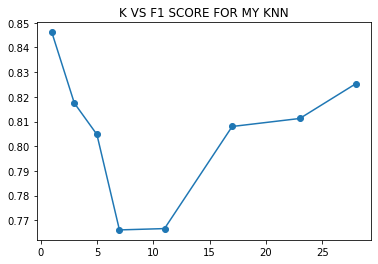

In [218]:
vals_of_k=[t[0] for t in f1_score]
vals_f1 = [t[1] for t in f1_score]
plt.plot(vals_of_k, vals_f1, marker='o')
plt.title('K VS F1 SCORE FOR MY KNN')
plt.show()

### Train and test Sklearn's KNN classifier model on your data (use metric which gave best results on your experimentation with built-from-scratch model.)

In [219]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(tfidf_vectors, y, test_size=0.2)

In [220]:
from sklearn import metrics

In [221]:
list_K=[1,3,5,7,11,17,23,28]

In [222]:
from sklearn.neighbors import KNeighborsClassifier
pyth_f1=[]
for k in list_K:
    off_knn = KNeighborsClassifier(n_neighbors=k,metric="cosine")
    off_knn.fit(x_train,Y_train)
    y_prediction = off_knn.predict(x_test)
    pyth_f1.append(metrics.f1_score(Y_test, y_prediction,pos_label=1))
    

In [223]:
# pyth_f1

***Compare both the models result.***

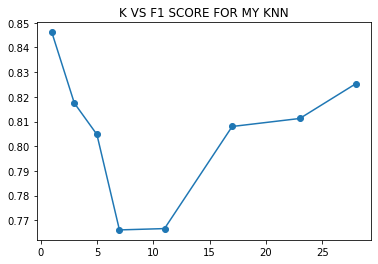

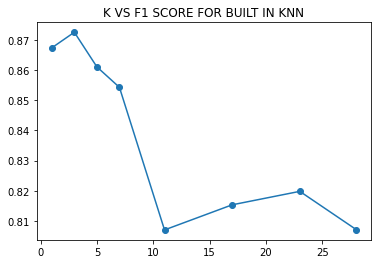

In [224]:
vals_of_k=[t[0] for t in f1_score]
vals_f1 = [t[1] for t in f1_score]
plt.plot(vals_of_k, vals_f1, marker='o')
plt.title('K VS F1 SCORE FOR MY KNN')
plt.show()

plt.plot(list_K, pyth_f1, marker='o')
plt.title('K VS F1 SCORE FOR BUILT IN KNN')
plt.show()

***What is the time complexity of training using KNN classifier?***

The time complexity of training using KNN is O(1).

***What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?***

The time complexity while testing will be <b>O(N*D)</b> for a single test sample, where N is the number of rows in training dataset and D is the dimension in the training dataset.<br> KNN is not a  linear classifier as the distance function used to find the k nearest neighbors is not linear, so it doesn't lead to a linear decision boundary.